Your Name and PRN:
- Name: Rajesh Singh
- PRN : 240840128028
- Date: 30/11/2024

# Image Processing with Neural Network
## Assignment A05

## Tensor Flow
- Select number of layers
- Select node in each of the layers
- Choose activation function
- multi-class - Fashion MNIST dataset (all 60000 images)
- Implement one or more of following to achieve max accuracy.
    - L1/ L2 Regularization
    - Dropout
    - Batch Normalization
    - Early stopping
- Save model

$$\text{
Importing the Necessary Libraries
}
$$

In [1]:
###-----------------
### Import Libraries
###-----------------
import sys


sys.path.append('../')

import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

from utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix


$$\text{
Setting Global Varables
}
$$

In [2]:
###----------------
# Global Variables
###----------------


RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)



TEST_SIZE =  0.2
ALPHA = 0.001
EPOCHS = 20
BATCH_SIZE = 32
PATIENCE = 6
LR_FACTOR = 0.1
LR_PATIENCE = 10

# set location of input files and output files
inpDir = '../input'
outDir = '../output'
modelDir = '../models' 
subDir = 'fashion_mnist'


# Set plotting parameters
params = {
    'figure.figsize': (15,4),
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
}
plt.rcParams.update(params)


CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')




$$\text{
    Accuracy Score and Confusion Matrix Function
}$$


In [3]:
def accuracy_socre_confusion_matrix(data_ds, prediction_model, labels):
    y_true, y_pred = [], []
    for count, data in enumerate(data_ds):
        feat, label = data
        pred = prediction_model(feat).numpy().argmax(axis=1)
        y_true.extend(label)
        y_pred.extend(pred)
        
    print(len(y_true), len(y_pred))

    print(accuracy_score(y_true=y_true, y_pred=y_pred)*100)

    fn_plot_confusion_matrix(y_true, y_pred, labels=labels)

$$\text{
    Loading the data
}
$$

In [4]:
train_filename = os.path.join(inpDir, subDir, 'fashion-mnist_train.csv')
valid_filename = os.path.join(inpDir, subDir, 'fashion-mnist_test.csv')

train_df = pd.read_csv(train_filename, header = 0)
valid_df = pd.read_csv(valid_filename, header = 0)


train_df.shape, valid_df.shape

((60000, 785), (10000, 785))

In [5]:
class_names = {
    0: 'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal', 
    6: 'Shirt',
    7: 'Sneaker', 
    8:'Bag', 
    9: 'Ankle boot'
}

In [6]:
train_df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


$$
\text{
    Plot the Images
}$$

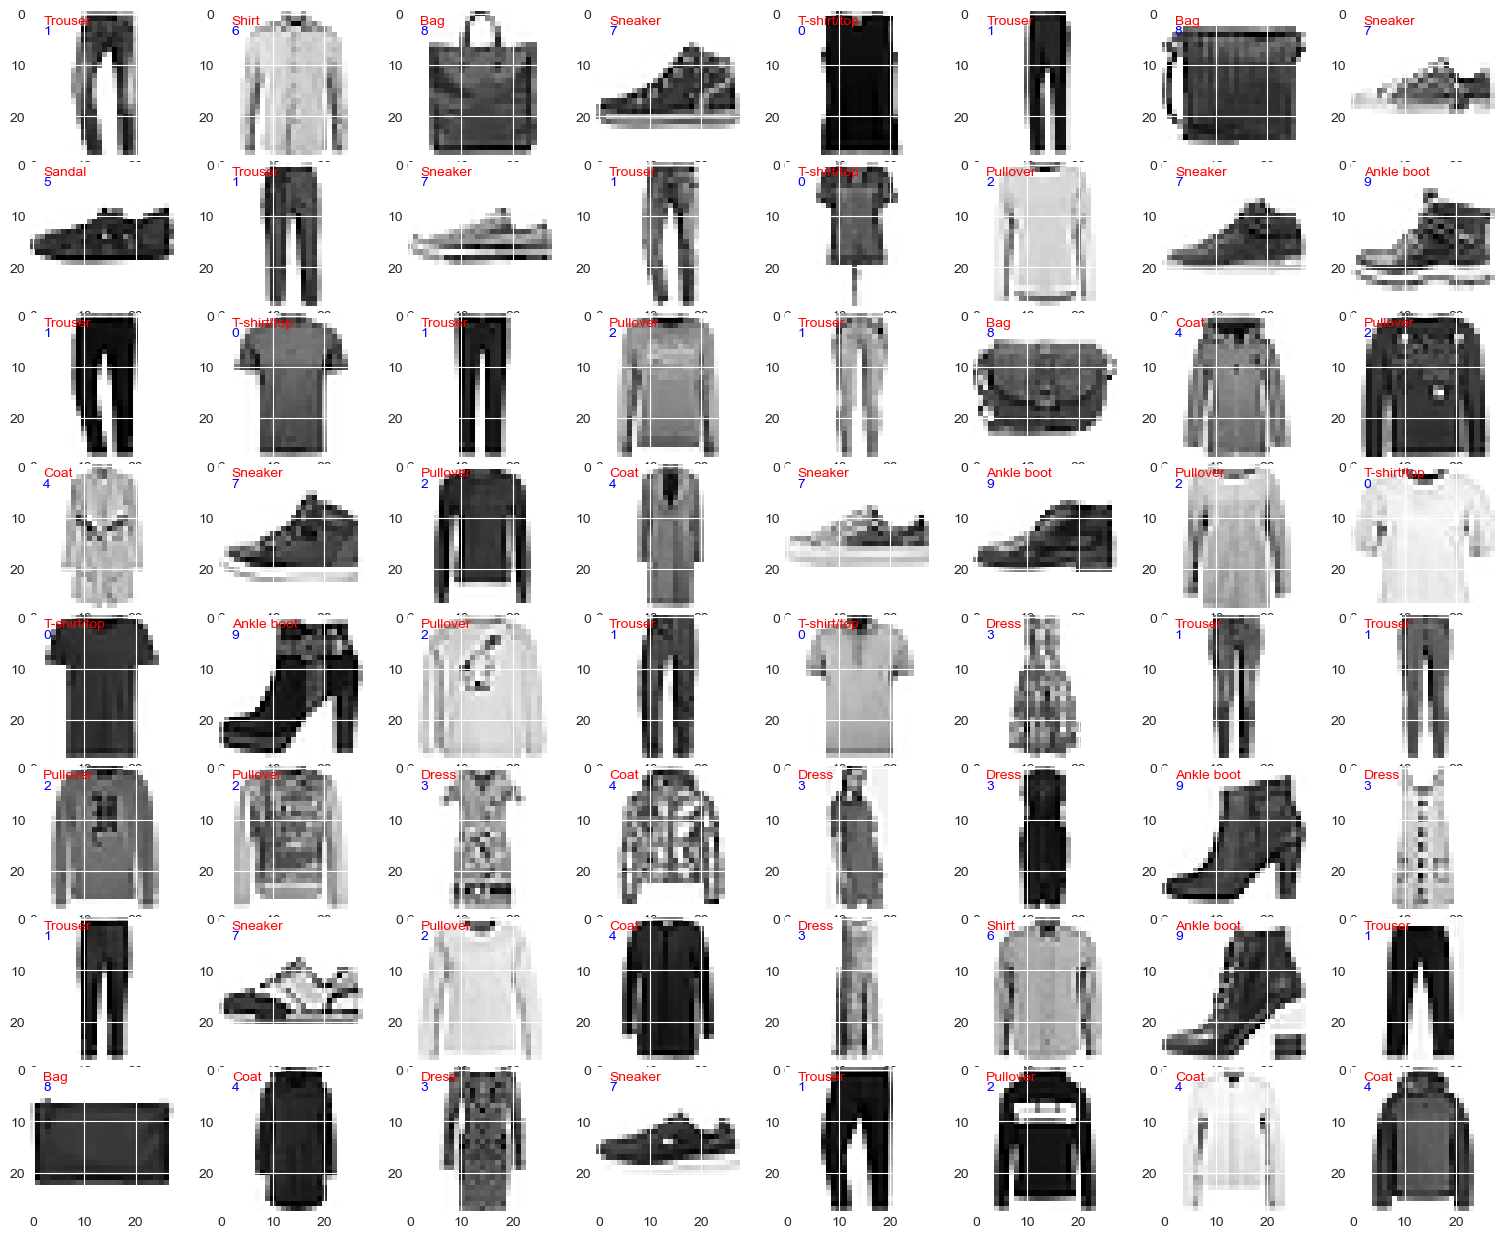

In [7]:
no_rows = 8
no_cols = 8

plot_df = train_df.sample(no_rows*no_cols)

fig = plt.figure(figsize=(15,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
i = 0

for idx, row in plot_df.iterrows():
    i += 1
    image  = row.values[1:].reshape(28,28)
    ax = fig.add_subplot(no_rows, no_cols, i)
    ax.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    ax.text(2,4, str(row.values[0]),color='b', fontsize=10)
    ax.text(2,2, class_names[row.values[0]],color='r', fontsize=10)

plt.show()  


$$\text{
    Train Test Split
}
$$

In [8]:
X_data = train_df.drop(columns=['label'], axis=1).to_numpy()
y_data = train_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_valid = valid_df.drop(columns=['label'], axis=1).to_numpy()
y_valid = valid_df['label'].to_numpy()


X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((48000, 784), (12000, 784), (48000,), (12000,))

$$\text{
    Scaling the Dataset
}
$$

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0
X_valid = X_valid/255.0

$$
\text{
Converting to dataset for batch processing instead of all data training at once
}
$$

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid,y_valid))

type(train_ds), type(test_ds), type(valid_ds)

(tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

In [11]:
train_shape = X_train.shape
test_shape = X_test.shape
valid_shape = X_valid.shape

in_len = train_shape[1]
out_len = len(np.unique(y_train))

$$\text{
    Clearing the memory 
}$$

In [12]:
import gc

del train_df, valid_df, X_train, y_train, X_test, y_test, X_valid, y_valid
gc.collect()
gc.collect()

0

$$
\text{
    Converting the data to a tensor dataset using Preprocessing and Batching
}
$$

In [13]:
train_ds = train_ds.shuffle(buffer_size = train_shape[0]).batch(BATCH_SIZE)
test_ds = test_ds.shuffle(buffer_size = test_shape[0]).batch(BATCH_SIZE)
valid_ds = valid_ds.shuffle(buffer_size = valid_shape[0]).batch(BATCH_SIZE)

In [14]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
# ONly for testing
next(iter(train_ds))

(<tf.Tensor: shape=(32, 784), dtype=float64, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])>,
 <tf.Tensor: shape=(32,), dtype=int64, numpy=
 array([3, 3, 0, 7, 8, 4, 6, 0, 3, 5, 0, 3, 9, 8, 3, 8, 6, 8, 3, 1, 2, 3,
        8, 9, 1, 3, 8, 4, 0, 5, 7, 5], dtype=int64)>)

$$\Large\text{
    Standard Model 
}
$$

**Sequential API**

```python
model = tf.keras.Sequential([
    tf.keras.Input(shape=(in_len,), name = 'input'), 
    tf.keras.layers.Dense(392, activation=tf.keras.activations.relu, name='fc_1'),
    tf.keras.layers.Dense(196, activation=tf.keras.activations.relu, name='fc_2'),
    tf.keras.layers.Dense(98, activation=tf.keras.activations.relu, name='fc_3'),
    tf.keras.layers.Dense(49, activation=tf.keras.activations.relu, name='fc_4'),
    tf.keras.layers.Dense(out_len, name = 'output')
])
````

**Functional API**

In [16]:
# Input
inputs = tf.keras.Input(shape=(784,), name='input')


# Hidden Layer
x = tf.keras.layers.Dense(392, activation=tf.keras.activations.relu, name='fc_1')(inputs)
x = tf.keras.layers.Dense(196, activation=tf.keras.activations.relu, name='fc_2')(x)
x = tf.keras.layers.Dense(98, activation=tf.keras.activations.relu, name='fc_3')(x)
x = tf.keras.layers.Dense(49, activation=tf.keras.activations.relu, name='fc_4')(x)

# Output 
outputs = tf.keras.layers.Dense(out_len, name='output')(x)

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

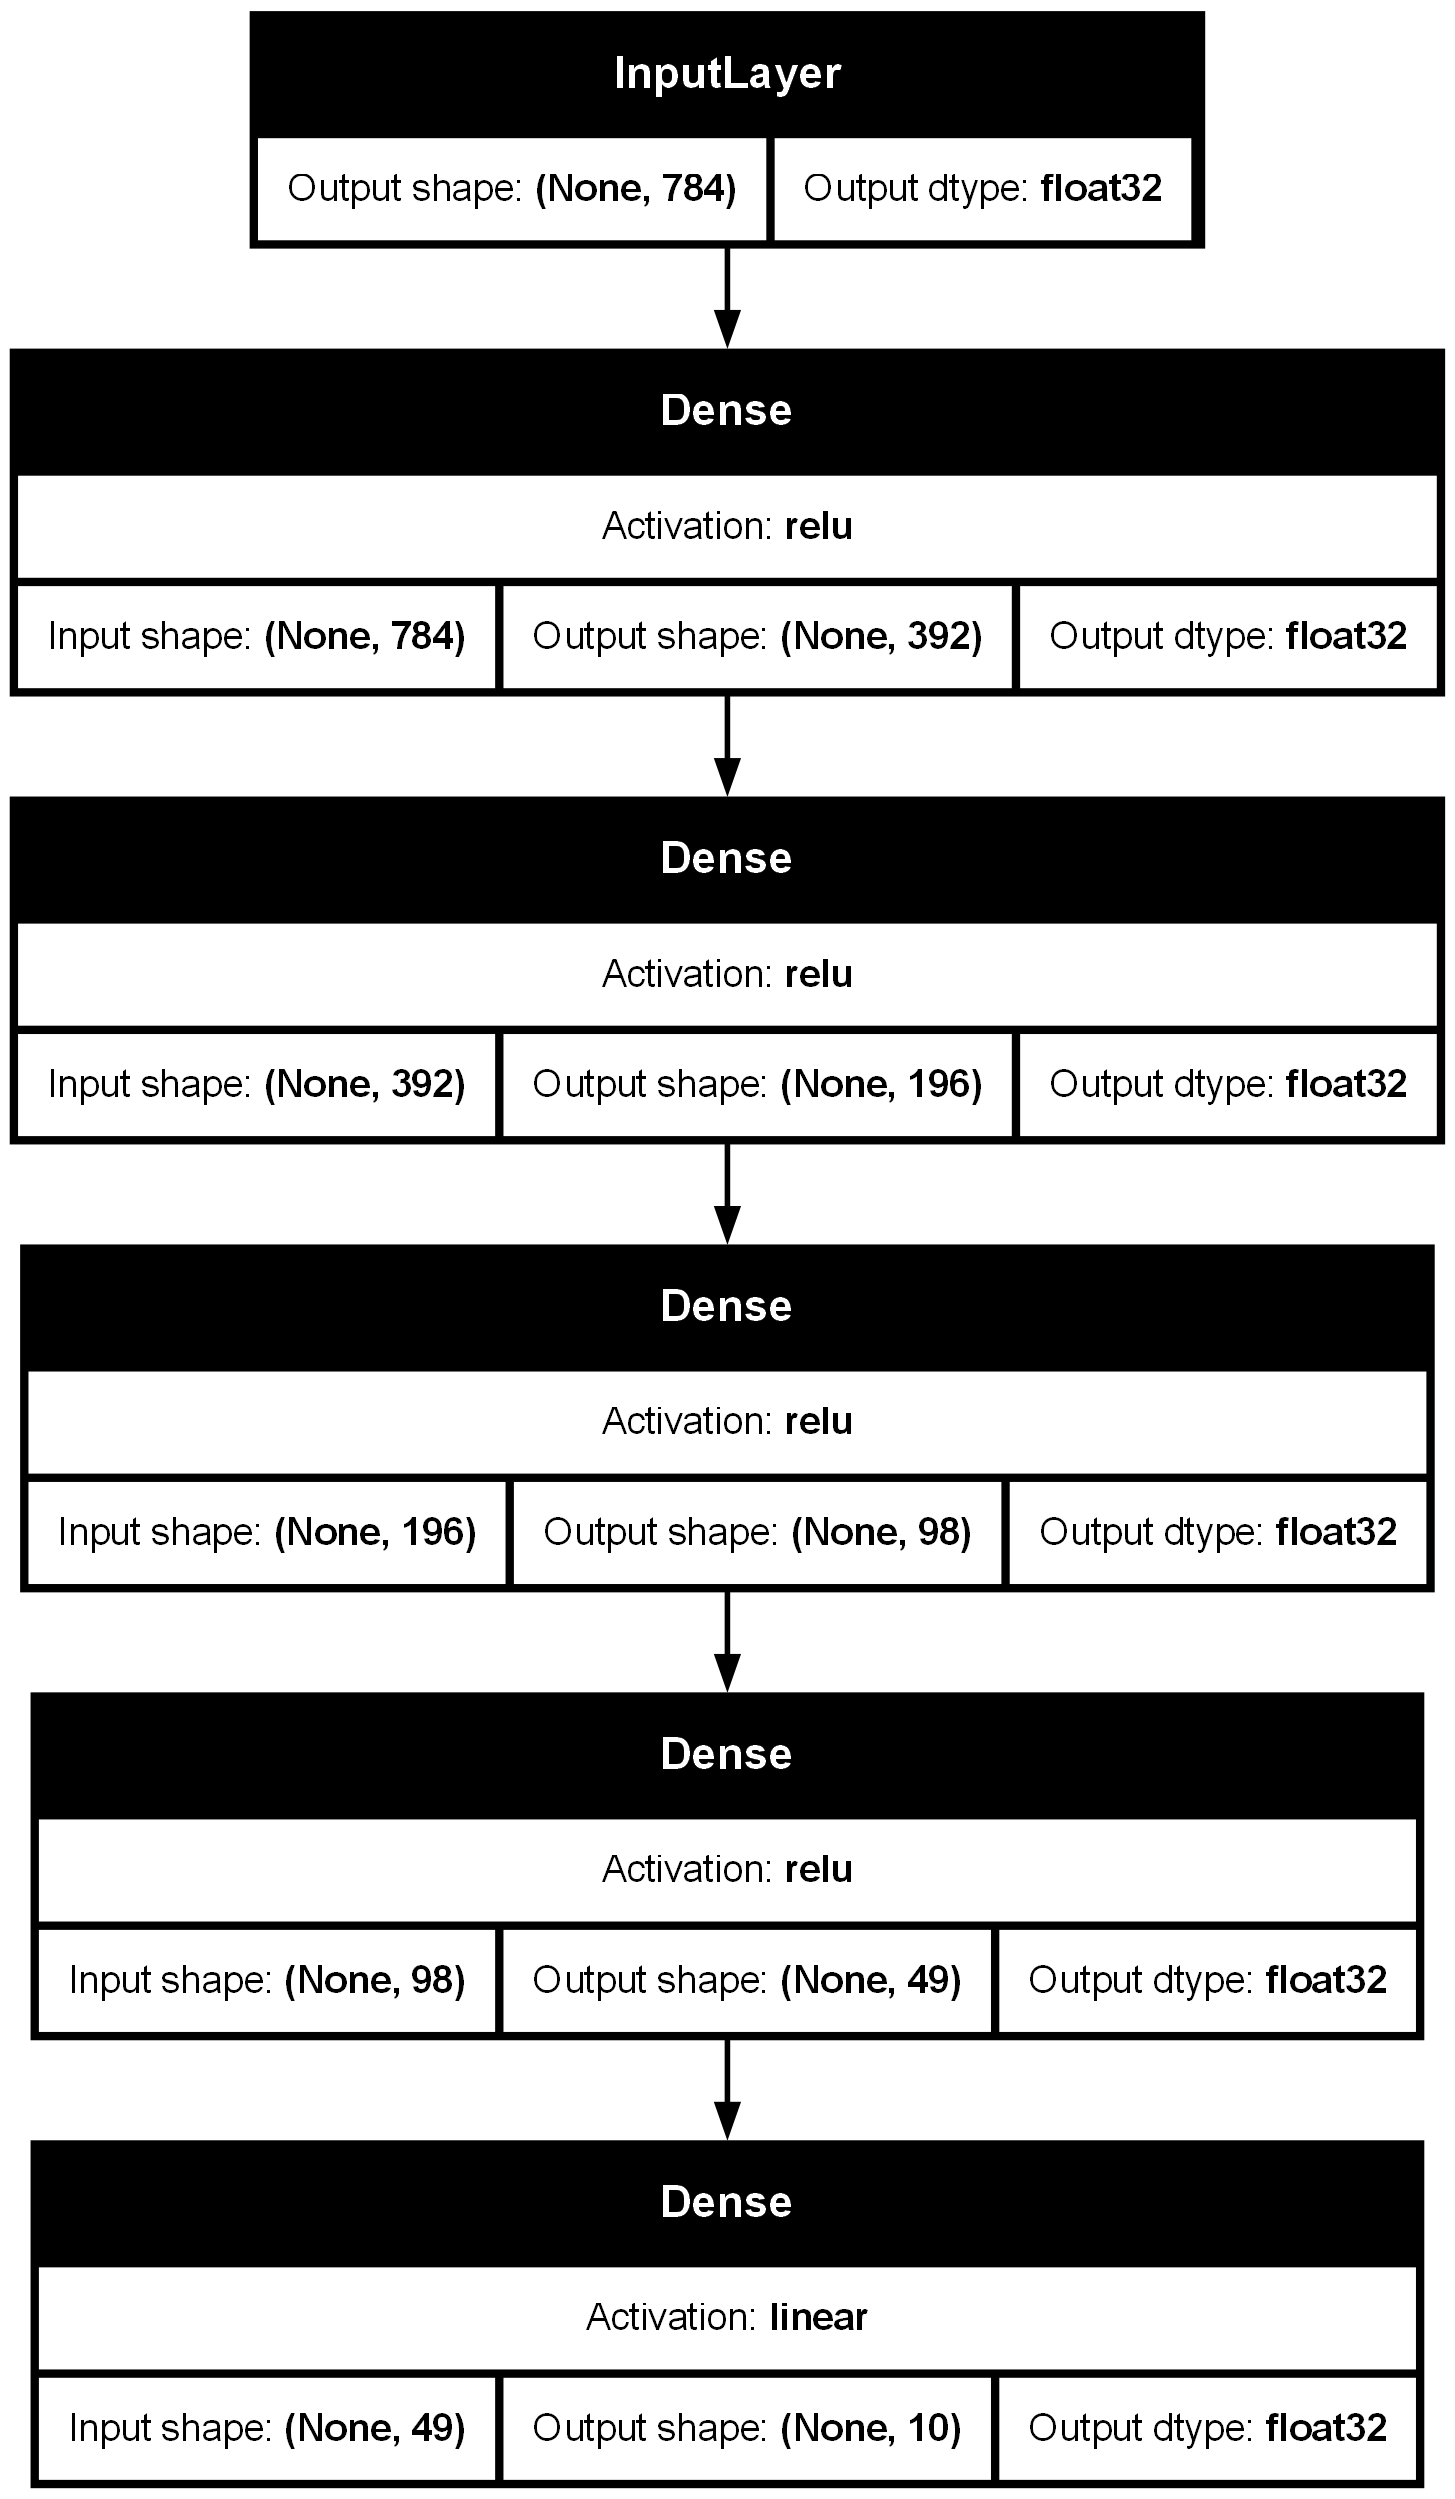

In [19]:
tf.keras.utils.plot_model(
    model, 
    os.path.join(outDir, 'mnist_dataset.png'),
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
)

$$\text{
    Compiling the model
}
$$

In [20]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)


# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [21]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7571 - loss: 0.6757 - val_accuracy: 0.8530 - val_loss: 0.3990
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8533 - loss: 0.4026 - val_accuracy: 0.8655 - val_loss: 0.3668
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8710 - loss: 0.3547 - val_accuracy: 0.8692 - val_loss: 0.3490
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8825 - loss: 0.3208 - val_accuracy: 0.8763 - val_loss: 0.3412
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8898 - loss: 0.2978 - val_accuracy: 0.8708 - val_loss: 0.3513
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8960 - loss: 0.2826 - val_accuracy: 0.8767 - val_loss: 0.3400
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8999 - loss: 0.2698 - val_accuracy: 0.8755 - val_loss: 0.3477
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9066 - loss: 0.2516 -

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.811375,0.521493,0.853000,0.399030
1,0.858063,0.388398,0.865500,0.366795
2,0.874729,0.346572,0.869167,0.349015


,accuracy,loss,val_accuracy,val_loss
17,0.931979,0.179013,0.891083,0.413161
18,0.933937,0.175991,0.889083,0.411340
19,0.936875,0.167102,0.889667,0.406737


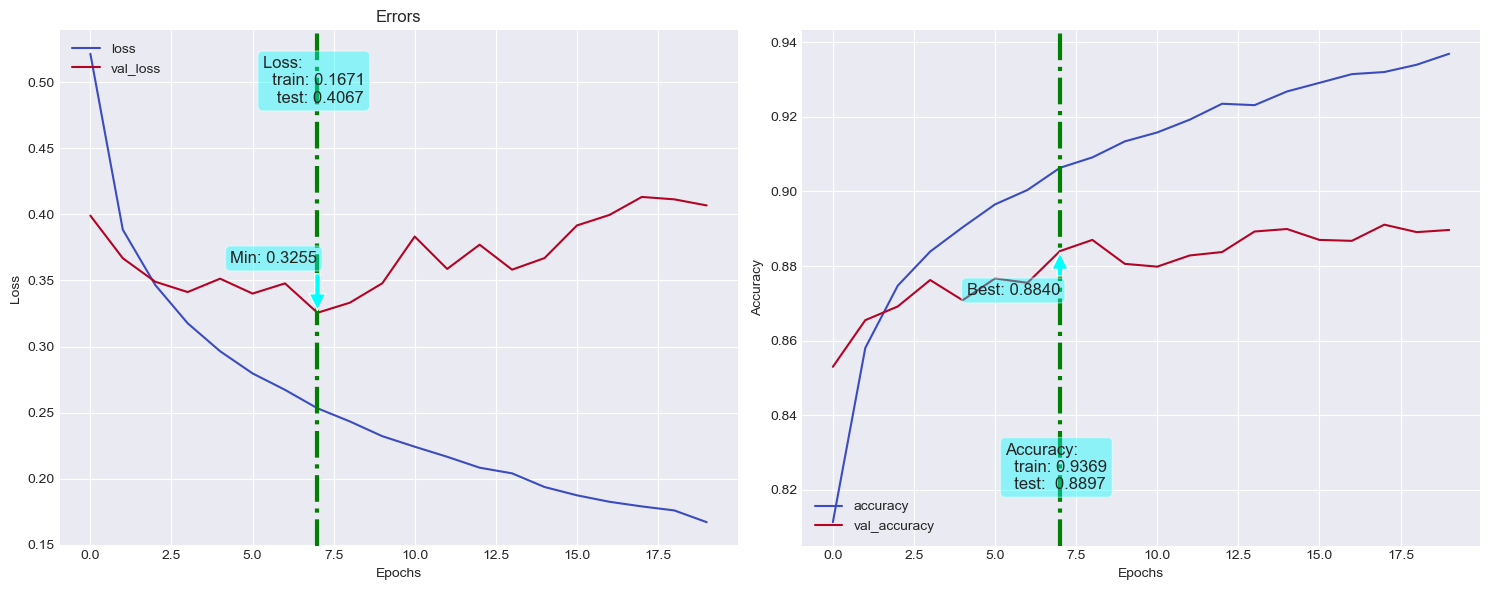

In [22]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [23]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional (Functional)         │ (None, 10)             │       409,405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Dataset Train
48000 48000
93.0875


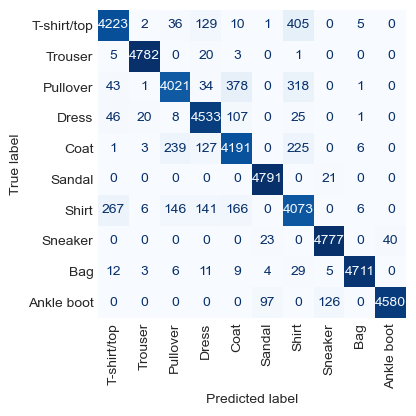

Dataset Test
12000 12000
88.96666666666667


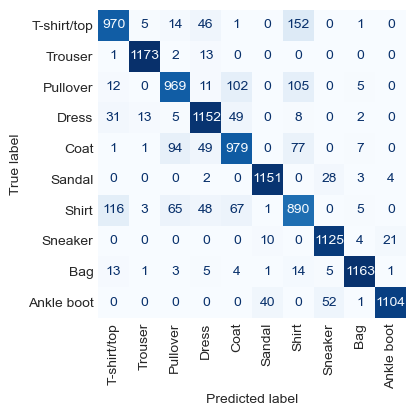

Dataset Validation
10000 10000
89.18


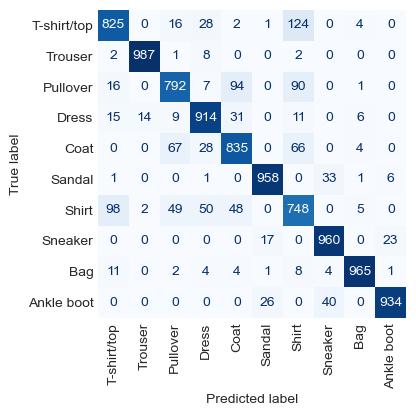

In [24]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [25]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_modelnormal.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_modelnormal.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 3ms/step - accuracy: 0.8897 - loss: 0.4067
Test accuracy: 0.8896666765213013
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[8 3 4 9 0]


---

$$\large\text{
    Model With Initializer
}
$$

In [26]:
# inintializer
initializer = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)

# Input
inputs = tf.keras.Input(shape=(784,), name='input')


# Hidden Layer
x = tf.keras.layers.Dense(
    392, 
    kernel_initializer=initializer,
    activation=tf.keras.activations.relu, 
    name='fc_1'
)(inputs)
x = tf.keras.layers.Dense(
    196, 
    kernel_initializer=initializer,
    activation=tf.keras.activations.relu, 
    name='fc_2'
)(x)
x = tf.keras.layers.Dense(
    98, 
    kernel_initializer=initializer,
    activation=tf.keras.activations.relu, 
    name='fc_3'
)(x)
x = tf.keras.layers.Dense(
    49, 
    kernel_initializer=initializer,
    activation=tf.keras.activations.relu, 
    name='fc_4'
)(x)

# Output 
outputs = tf.keras.layers.Dense(
    out_len, 
    kernel_initializer=initializer,
    name='output'
)(x)

                                
# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [27]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

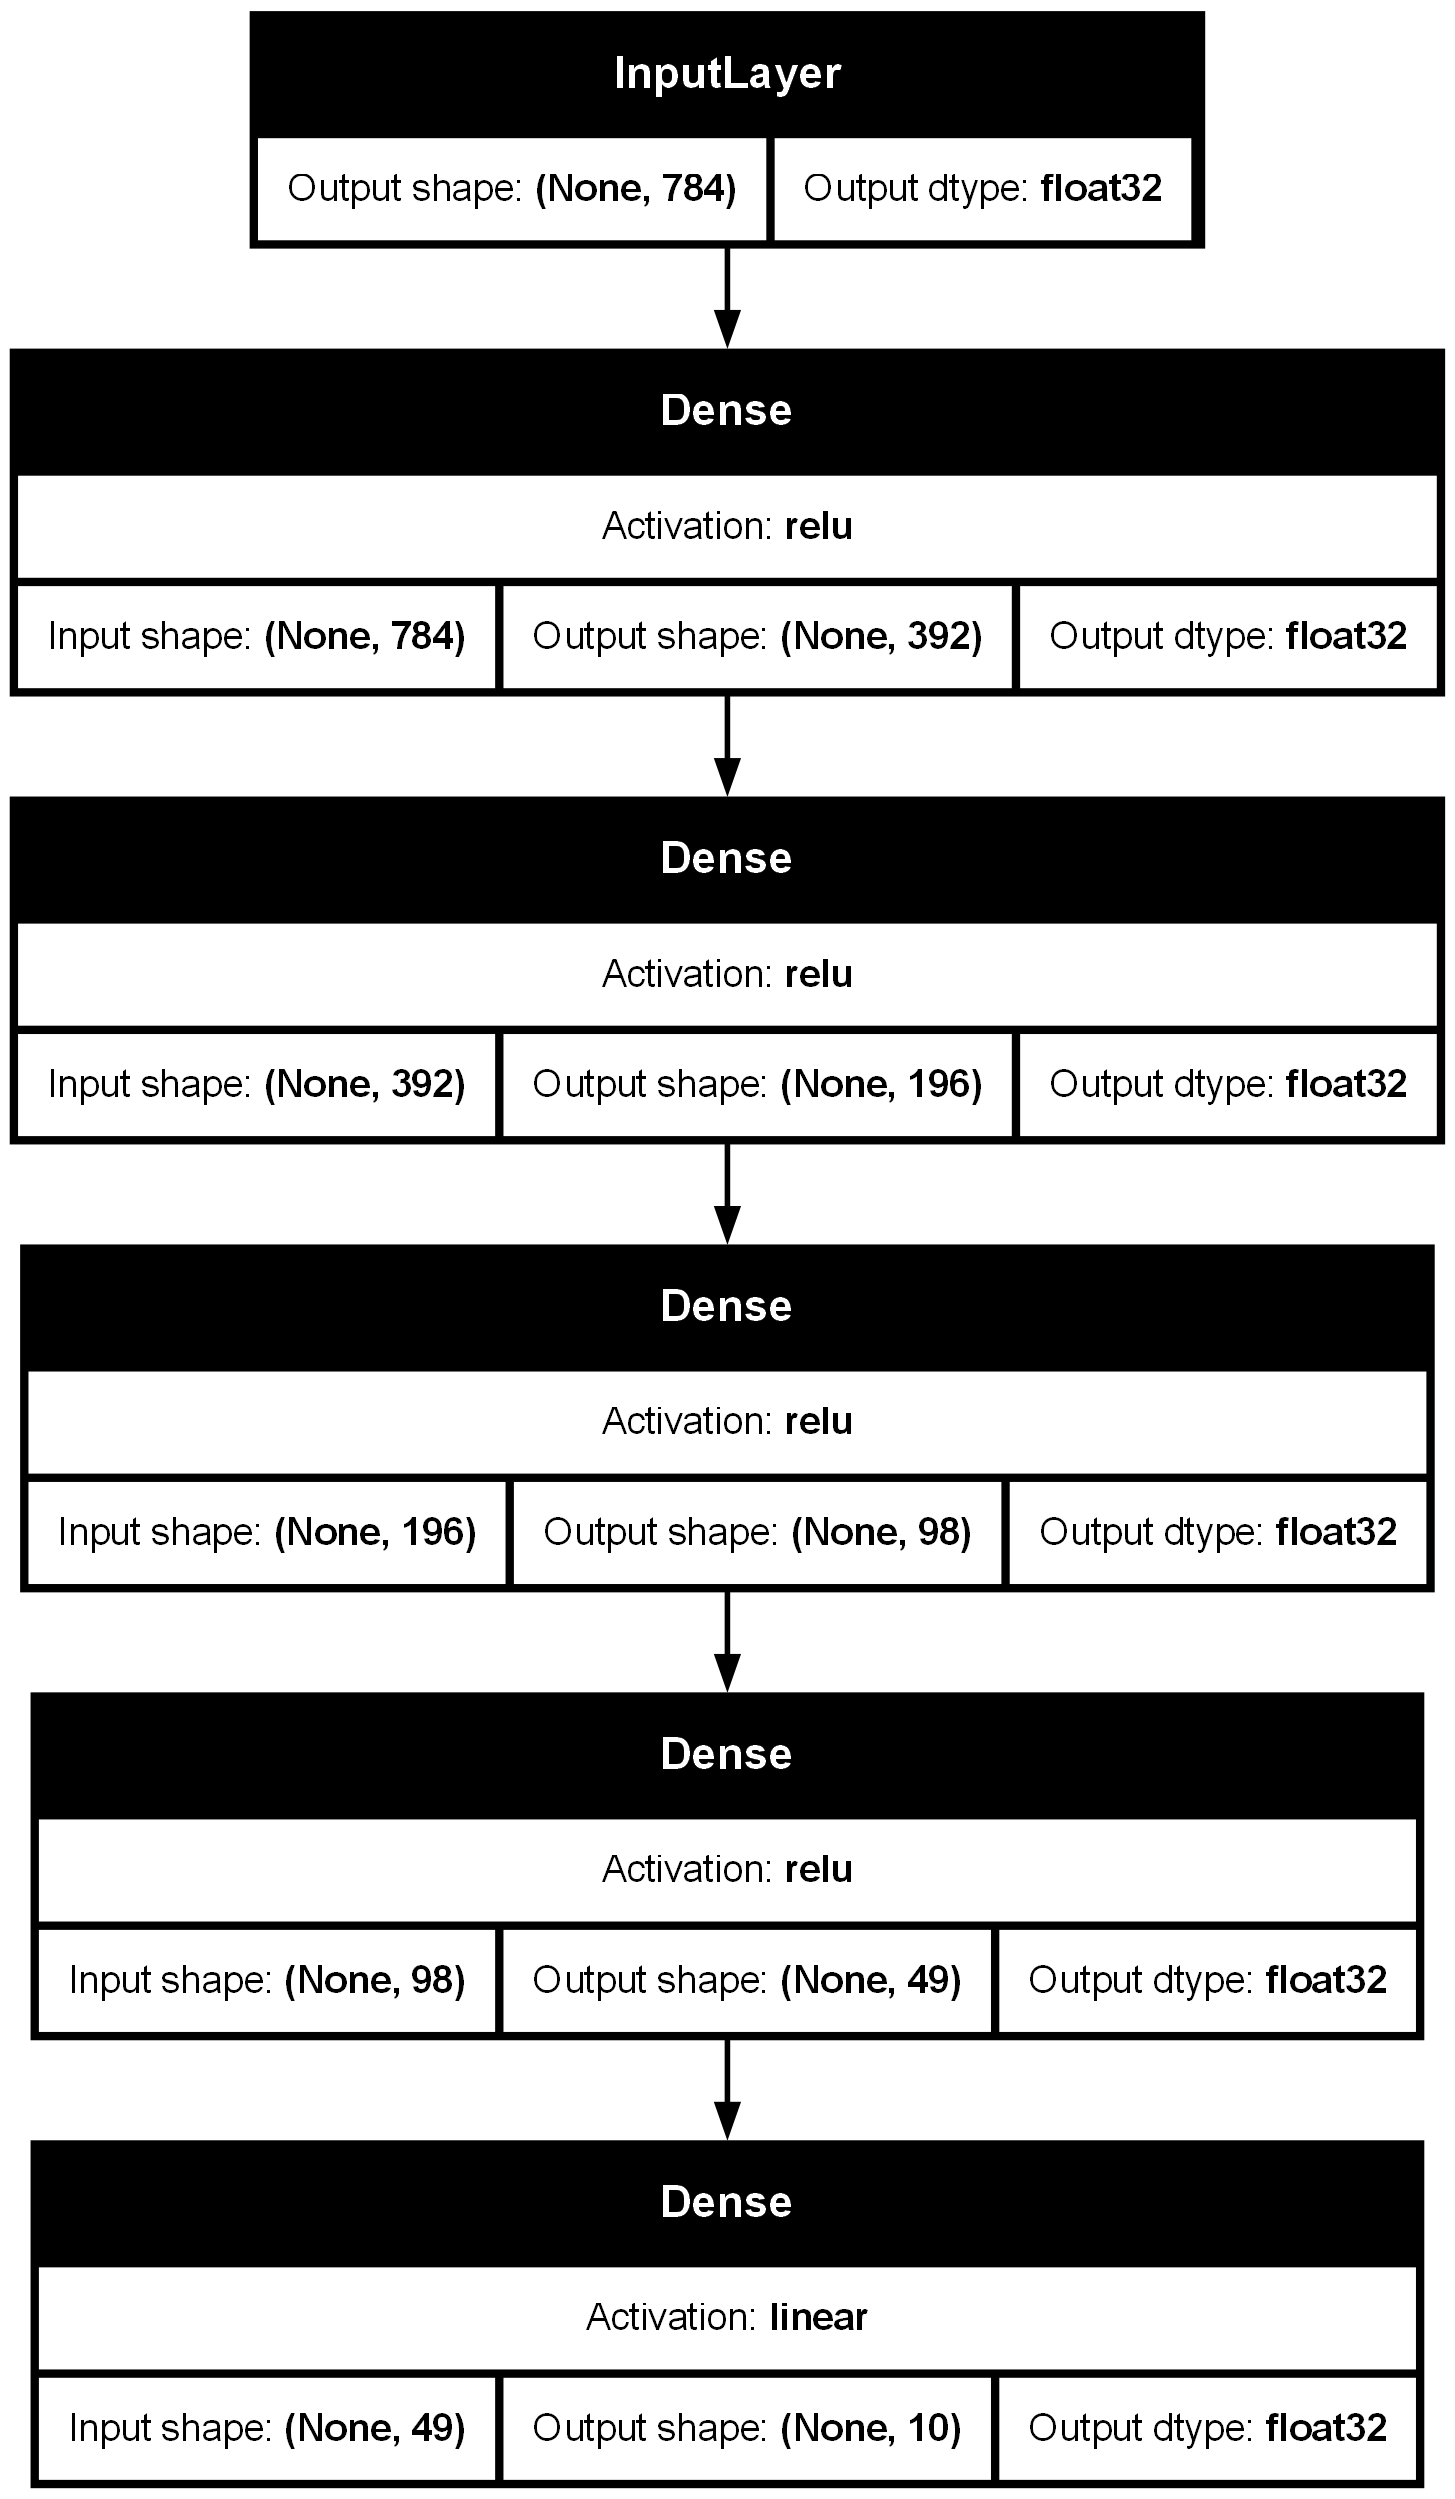

In [29]:
tf.keras.utils.plot_model(
    model, 
    os.path.join(outDir, 'mnist_dataset.png'),
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
)

$$\text{
    Compiling the model
}
$$

In [30]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [31]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7505 - loss: 0.6808 - val_accuracy: 0.8580 - val_loss: 0.3837
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8539 - loss: 0.4027 - val_accuracy: 0.8664 - val_loss: 0.3627
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8710 - loss: 0.3535 - val_accuracy: 0.8763 - val_loss: 0.3450
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8809 - loss: 0.3248 - val_accuracy: 0.8780 - val_loss: 0.3373
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8877 - loss: 0.3034 - val_accuracy: 0.8834 - val_loss: 0.3278
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8940 - loss: 0.2850 - val_accuracy: 0.8786 - val_loss: 0.3411
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8992 - loss: 0.2694 - val_accuracy: 0.8741 - val_loss: 0.3660
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9046 - loss: 0.2560 - 

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.810021,0.522866,0.858000,0.383735
1,0.858063,0.390040,0.866417,0.362687
2,0.873187,0.348342,0.876250,0.345037


,accuracy,loss,val_accuracy,val_loss
17,0.930667,0.181600,0.87975,0.395855
18,0.932292,0.176875,0.88125,0.406362
19,0.934438,0.172798,0.87650,0.441008


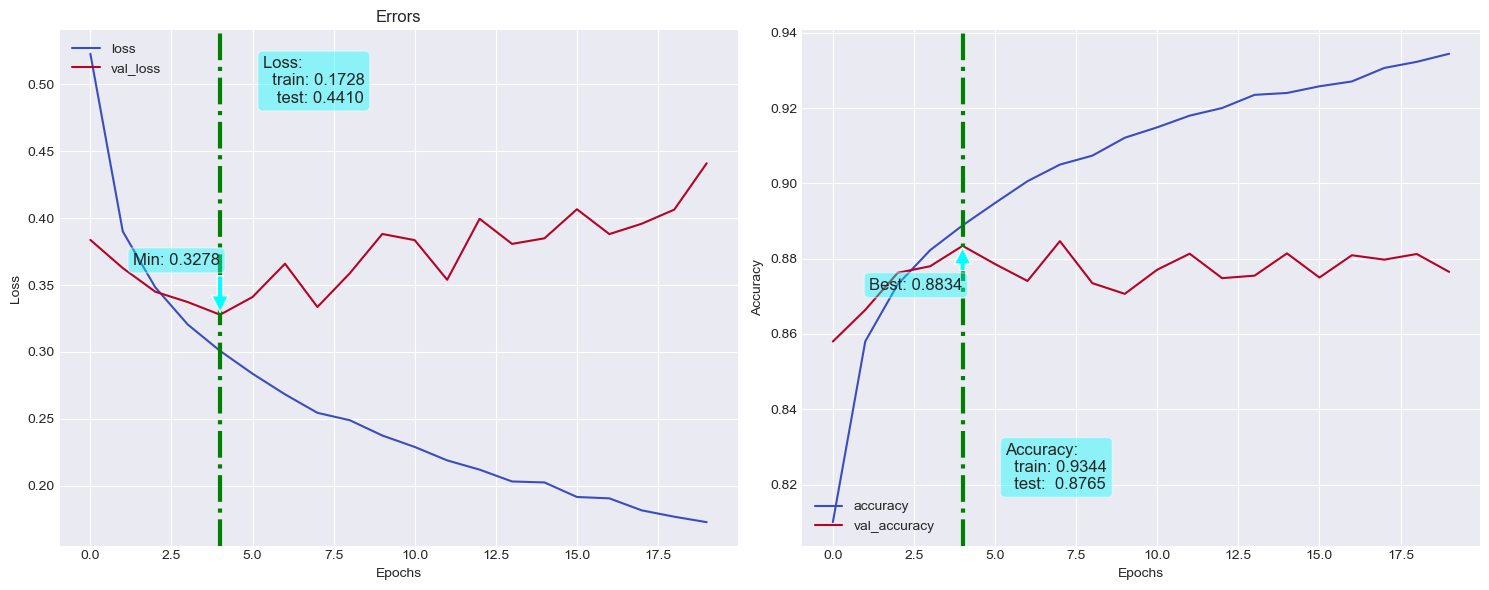

In [32]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

In [33]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_2 (Functional)       │ (None, 10)             │       409,405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

Dataset Train
48000 48000
91.24375


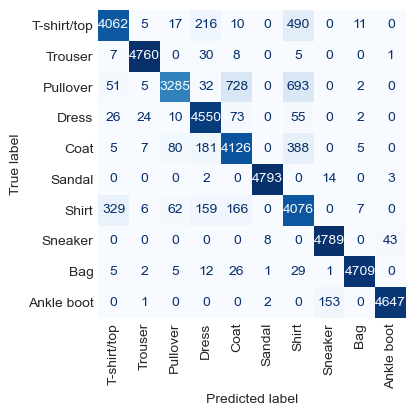

Dataset Test
12000 12000
87.64999999999999


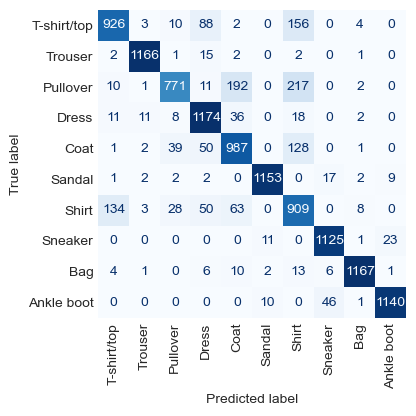

Dataset Validation
10000 10000
87.71


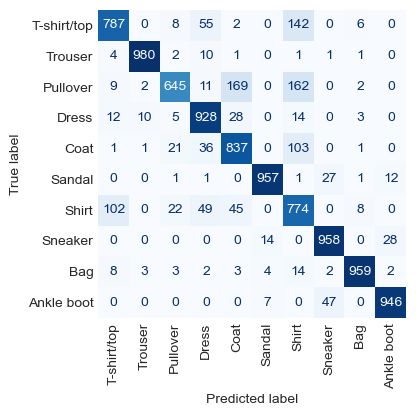

In [34]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [35]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_initializer.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_initializer.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 3ms/step - accuracy: 0.8765 - loss: 0.4410
Test accuracy: 0.8765000104904175
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[8 3 4 9 0]


---

$$\large\text{
    With Regularization
}$$

In [36]:
# inintializer
initializer = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)

# regilarization
regularizer = tf.keras.regularizers.l2(l2=0.05) # l -> tune

# Input
inputs = tf.keras.Input(shape=(784,), name='input')


# Hidden Layer
x = tf.keras.layers.Dense(
    392, 
    kernel_initializer=initializer,
    kernel_regularizer=regularizer,
    activation=tf.keras.activations.relu, 
    name='fc_1'
)(inputs)
x = tf.keras.layers.Dense(
    196, 
    kernel_initializer=initializer,
    kernel_regularizer=regularizer,
    activation=tf.keras.activations.relu, 
    name='fc_2'
)(x)
x = tf.keras.layers.Dense(
    98, 
    kernel_initializer=initializer,
    kernel_regularizer=regularizer,
    activation=tf.keras.activations.relu, 
    name='fc_3'
)(x)
x = tf.keras.layers.Dense(
    49, 
    kernel_initializer=initializer,
    kernel_regularizer=regularizer,
    activation=tf.keras.activations.relu, 
    name='fc_4'
)(x)

# Output 
outputs = tf.keras.layers.Dense(
    out_len,
    kernel_initializer=initializer,
    kernel_regularizer=regularizer,
    activation=tf.keras.activations.softmax, 
    name='output'
)(x)
# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [37]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [38]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

$$\text{
    Compiling the model
}
$$

In [39]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [40]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/20


c:\Users\DAI.STUDENTSDC\.conda\envs\pythonProject\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5414 - loss: 6.6952 - val_accuracy: 0.5908 - val_loss: 1.9389
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6366 - loss: 1.9251 - val_accuracy: 0.6042 - val_loss: 1.9108
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6500 - loss: 1.8920 - val_accuracy: 0.6225 - val_loss: 1.8917
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6564 - loss: 1.8692 - val_accuracy: 0.6509 - val_loss: 1.8616
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6625 - loss: 1.8529 - val_accuracy: 0.6578 - val_loss: 1.8506
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6648 - loss: 1.8453 - val_accuracy: 0.6566 - val_loss: 1.8466
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6657 - loss: 1.8406 - val_accuracy: 0.6556 - val_loss: 1.8443
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6650 - loss: 1.8365 - val_accurac

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.588208,3.084032,0.590833,1.938910
1,0.642125,1.918575,0.604167,1.910785
2,0.650792,1.890449,0.622500,1.891664


,accuracy,loss,val_accuracy,val_loss
17,0.670583,1.825699,0.652417,1.834045
18,0.670000,1.825000,0.652667,1.832954
19,0.668875,1.824250,0.651583,1.832637


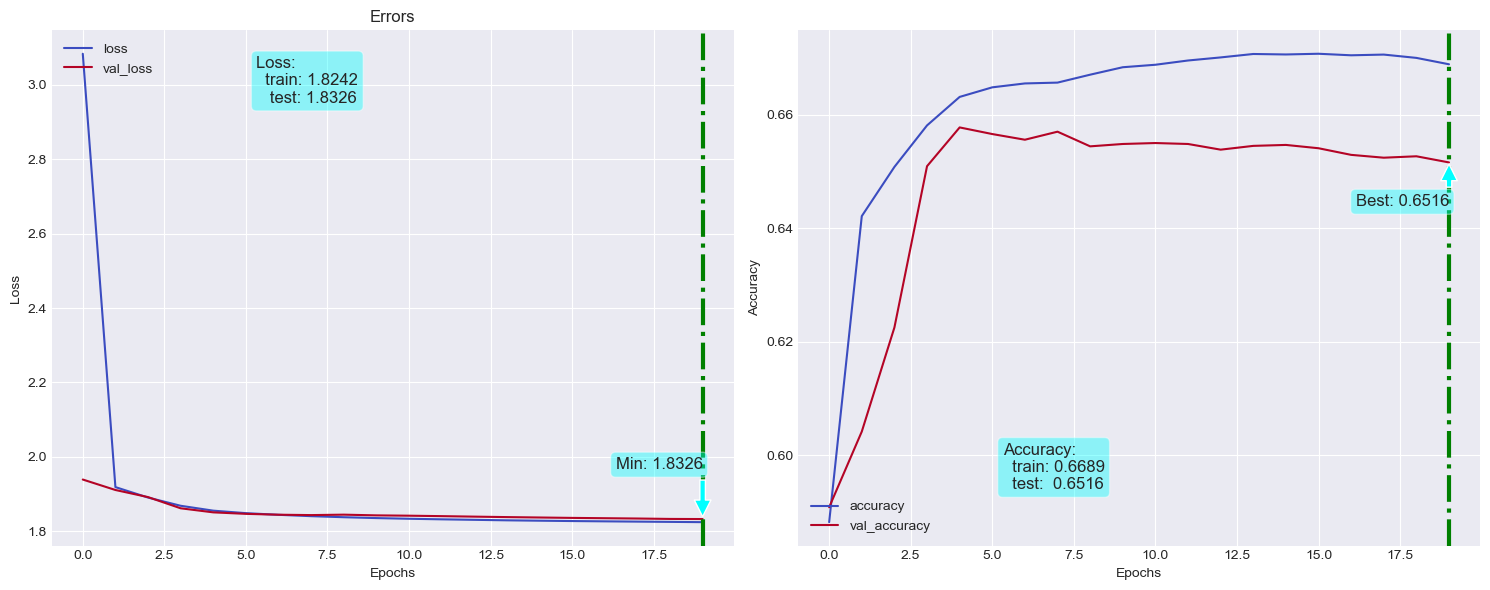

In [41]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [42]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_4 (Functional)       │ (None, 10)             │       409,405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$
\text{
Accuracy and Confusion Matrix
}
$$

Dataset Train
48000 48000
65.08333333333334


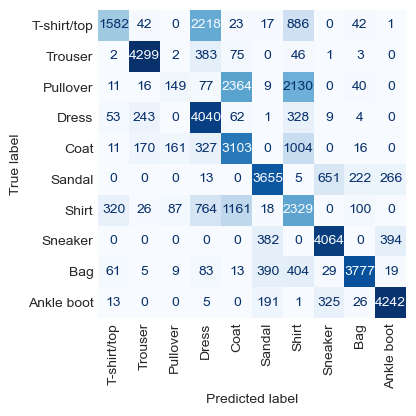

Dataset Test
12000 12000
65.15833333333333


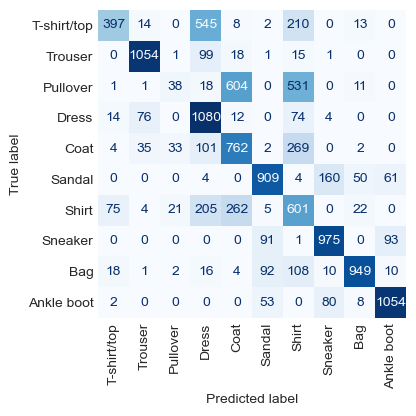

Dataset Validation
10000 10000
65.38000000000001


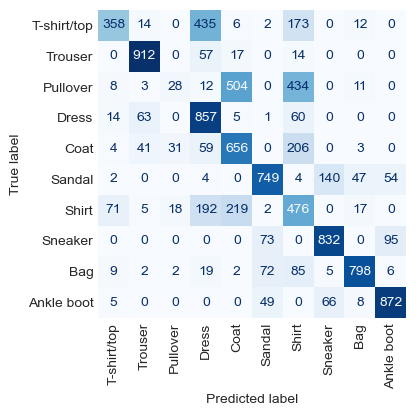

In [43]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [44]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_regularizer.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_regularizer.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


c:\Users\DAI.STUDENTSDC\.conda\envs\pythonProject\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


375/375 - 1s - 4ms/step - accuracy: 0.6516 - loss: 1.8326
Test accuracy: 0.6515833139419556
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3 3 2 9 0]


---

$$\large\text{Batch Normalization}$$


In [45]:
# clear memory
del model
gc.collect()
gc.collect()

# inintializer
initializer = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)

# Input
inputs = tf.keras.Input(shape=(784,), name='input')



# Set 1st Hidden Layer
x = tf.keras.layers.Dense(
    392, 
    kernel_initializer=initializer,
    name='fc_1'
)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)

# Set 2nd Hidden Layer
x = tf.keras.layers.Dense(
    196, 
    kernel_initializer=initializer,
    name='fc_2'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)

# Set 3rd Hidden Layer
x = tf.keras.layers.Dense(
    98, 
    kernel_initializer=initializer,
    name='fc_3'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)

# Set 4th Hidden Layer
x = tf.keras.layers.Dense(
    49, 
    kernel_initializer=initializer,
    name='fc_4'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)

# Output 
outputs = tf.keras.layers.Dense(
    out_len, 
    kernel_initializer=initializer,
    name='output'
)(x)

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [46]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 392)            │         1,568 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 196)            │           784 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 98)             │           392 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 49)             │           196 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,345 (1.57 MB)

 Trainable params: 410,875 (1.57 MB)

 Non-trainable params: 1,470 (5.74 KB)

$$\text{
    Creating the loss function for the model
}
$$

In [47]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

$$\text{
    Compiling the model
}
$$

In [48]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [49]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7782 - loss: 0.6661 - val_accuracy: 0.8567 - val_loss: 0.3862
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8560 - loss: 0.3927 - val_accuracy: 0.8551 - val_loss: 0.3874
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8789 - loss: 0.3320 - val_accuracy: 0.8363 - val_loss: 0.4422
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8939 - loss: 0.2899 - val_accuracy: 0.8565 - val_loss: 0.4134
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9063 - loss: 0.2547 - val_accuracy: 0.8483 - val_loss: 0.4484
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9145 - loss: 0.2271 - val_accuracy: 0.8588 - val_loss: 0.4242
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9247 - loss: 0.2016 - val_accuracy: 0.8636 - val_loss: 0.4331
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9329 - loss: 0.1782

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.817542,0.522679,0.856667,0.386155
1,0.862792,0.377034,0.855083,0.387390
2,0.882896,0.323454,0.836333,0.442196


,accuracy,loss,val_accuracy,val_loss
17,0.973583,0.071126,0.883333,0.550634
18,0.974813,0.067568,0.873167,0.634803
19,0.976708,0.062811,0.866750,0.656400


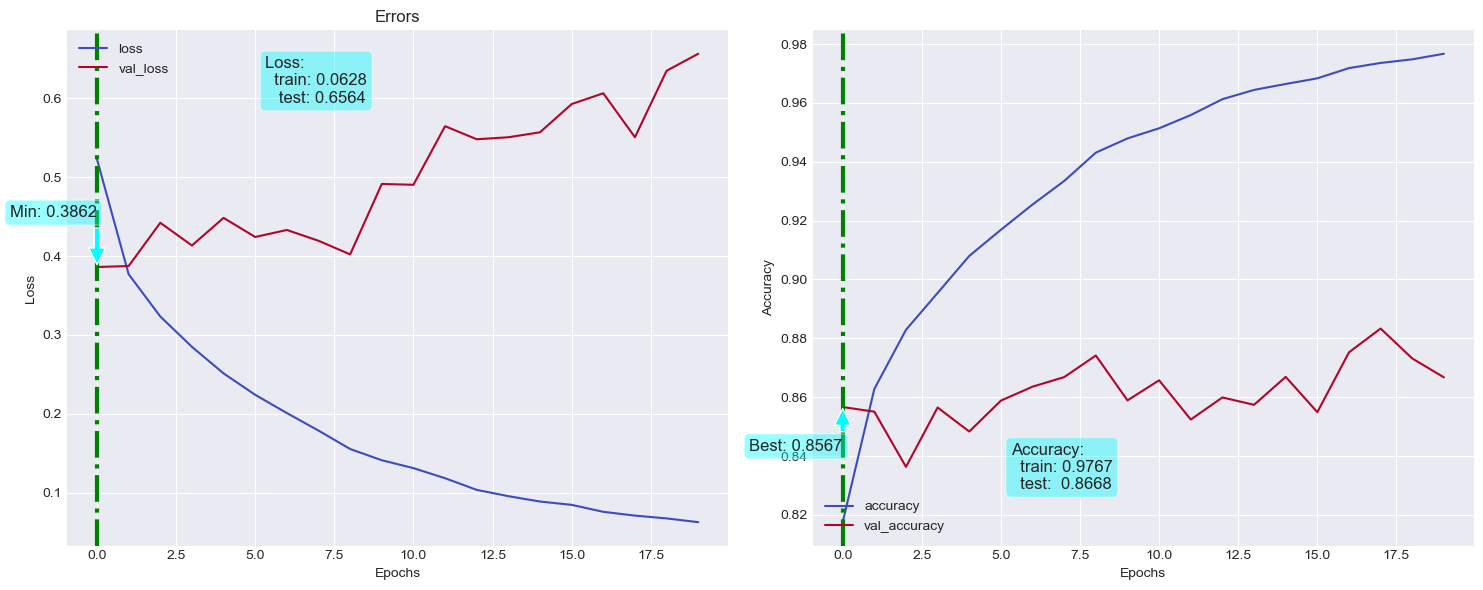

In [50]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [51]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_6 (Functional)       │ (None, 10)             │       412,345 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_3 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,345 (1.57 MB)

 Trainable params: 410,875 (1.57 MB)

 Non-trainable params: 1,470 (5.74 KB)

$$
\text{
Accuracy and Confusion Matrix
}
$$

Dataset Train
48000 48000
92.34583333333333


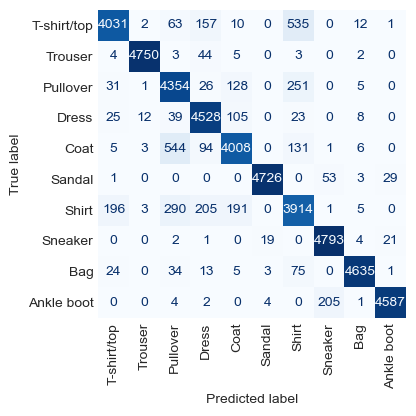

Dataset Test
12000 12000
86.675


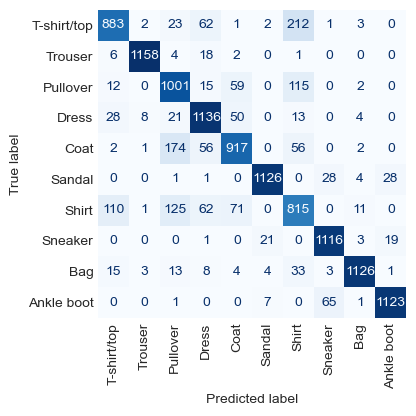

Dataset Validation
10000 10000
87.36


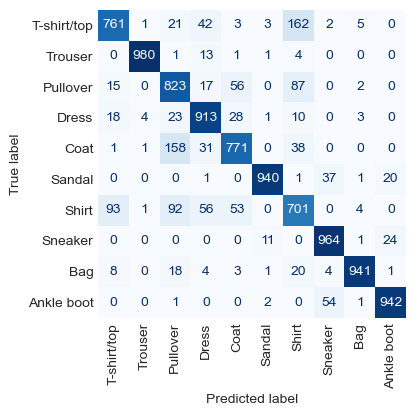

In [52]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [53]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_batchnorm.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_batchnorm.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 4ms/step - accuracy: 0.8668 - loss: 0.6564
Test accuracy: 0.8667500019073486
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[8 3 4 9 0]


---


$$\large\text{
    Model with Dropout
}$$

In [54]:
drops = [
    [0.3,0.3,0.3,0.3,0.3],
    [0.2,0.3,0.4,0.5,0.6],
    [0.6,0.5,0.4,0.3,0.2]
]

DOR1, DOR2, DOR3, DOR4, DOR5 = drops[1] # Best

# clear memory
del model
gc.collect()
gc.collect()

# inintializer
initializer = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)

# Input
inputs = tf.keras.Input(shape=(784,), name='input')


# Set 1st Hidden Layer
x = tf.keras.layers.Dense(
    392, 
    kernel_initializer=initializer,
    name='fc_1'
)(inputs)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR1)(x)

# Set 2nd Hidden Layer
x = tf.keras.layers.Dense(
    196, 
    kernel_initializer=initializer,
    name='fc_2'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR2)(x)

# Set 3rd Hidden Layer
x = tf.keras.layers.Dense(
    98, 
    kernel_initializer=initializer,
    name='fc_3'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR3)(x)

# Set 4th Hidden Layer
x = tf.keras.layers.Dense(
    49, 
    kernel_initializer=initializer,
    name='fc_4'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR4)(x)

# Output 
outputs = tf.keras.layers.Dense(
    out_len, 
    kernel_initializer=initializer,
    name='output'
)(x)

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [55]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [56]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

$$\text{
    Compiling the model
}
$$

In [57]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [58]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5740 - loss: 1.1723 - val_accuracy: 0.8263 - val_loss: 0.4838
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8088 - loss: 0.5840 - val_accuracy: 0.8447 - val_loss: 0.4304
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8255 - loss: 0.5217 - val_accuracy: 0.8548 - val_loss: 0.4091
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8395 - loss: 0.4808 - val_accuracy: 0.8583 - val_loss: 0.3921
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8449 - loss: 0.4685 - val_accuracy: 0.8643 - val_loss: 0.3937
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8519 - loss: 0.4413 - val_accuracy: 0.8723 - val_loss: 0.3689
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8544 - loss: 0.4279 - val_accuracy: 0.8704 - val_loss: 0.3756
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8572 - loss: 0.4218 -

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.695417,0.856365,0.826333,0.483752
1,0.813333,0.566053,0.844750,0.430426
2,0.828729,0.513124,0.854833,0.409100


,accuracy,loss,val_accuracy,val_loss
17,0.877750,0.358637,0.878583,0.356311
18,0.878729,0.356184,0.881000,0.349606
19,0.878958,0.353278,0.882583,0.346612


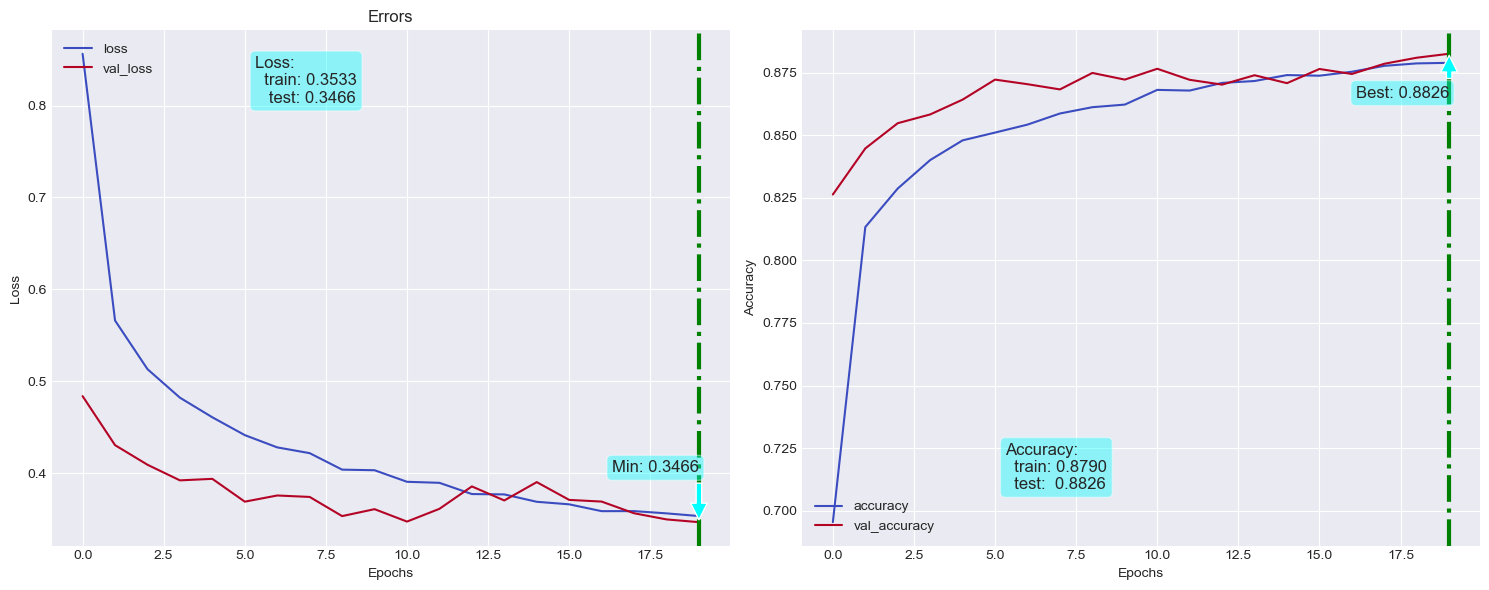

In [59]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [60]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_8 (Functional)       │ (None, 10)             │       409,405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_4 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$
\text{
Accuracy and Confusion Matrix
}
$$

Dataset Train
48000 48000
89.92916666666667


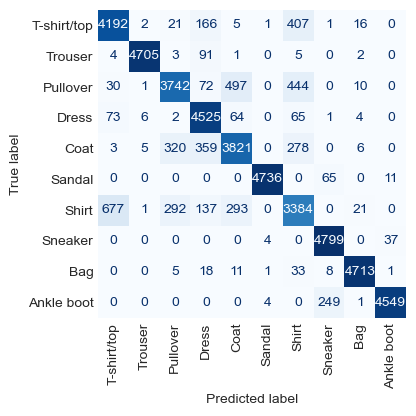

Dataset Test
12000 12000
88.25833333333334


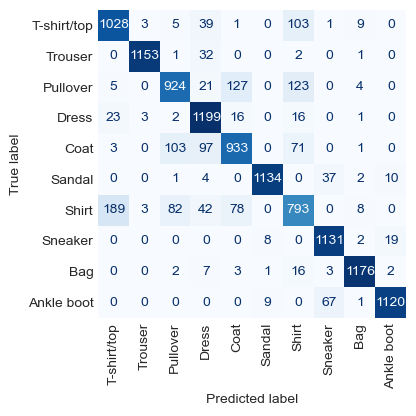

Dataset Validation
10000 10000
88.22


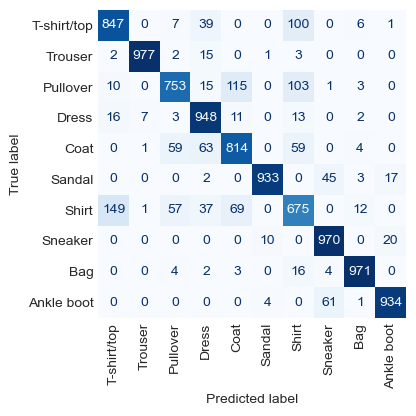

In [61]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [62]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_dropout.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_dropout.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 3ms/step - accuracy: 0.8826 - loss: 0.3466
Test accuracy: 0.8825833201408386
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[8 3 4 9 0]


---


$$\Large\text{
    Early Stopping
}$$

In [63]:
drops = [
    [0.3,0.3,0.3,0.3,0.3],
    [0.2,0.3,0.4,0.5,0.6],
    [0.6,0.5,0.4,0.3,0.2]
]

DOR1, DOR2, DOR3, DOR4, DOR5 = drops[1] # Best

# clear memory
del model
gc.collect()
gc.collect()

# inintializer
initializer = tf.keras.initializers.GlorotUniform(seed=RANDOM_STATE)

# Input
inputs = tf.keras.Input(shape=(784,), name='input')


# Set 1st Hidden Layer
x = tf.keras.layers.Dense(
    392, 
    kernel_initializer=initializer,
    name='fc_1'
)(inputs)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR1)(x)

# Set 2nd Hidden Layer
x = tf.keras.layers.Dense(
    196, 
    kernel_initializer=initializer,
    name='fc_2'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR2)(x)

# Set 3rd Hidden Layer
x = tf.keras.layers.Dense(
    98, 
    kernel_initializer=initializer,
    name='fc_3'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR3)(x)

# Set 4th Hidden Layer
x = tf.keras.layers.Dense(
    49, 
    kernel_initializer=initializer,
    name='fc_4'
)(x)
x = tf.keras.layers.Activation(activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(rate=DOR4)(x)

# Output 
outputs = tf.keras.layers.Dense(
    out_len, 
    kernel_initializer=initializer,
    name='output'
)(x)

# Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [64]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 98)             │        19,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 98)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [65]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

$$\text{
    Fitting the model
}
$$

In [66]:
chkptPath = os.path.join(modelDir, subDir, 'all_in.keras')

checpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    chkptPath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=PATIENCE,
    verbose=1, 
    restore_best_weights=True
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
)

$$\text{
    Compiling the model
}
$$

In [67]:
# Optimized for model
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

# Compile
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [68]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS,
    callbacks = [
        checpoint_cb,
        early_stopping_cb,
        lr_scheduler
    ]
)

Epoch 1/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5668 - loss: 1.1895
Epoch 1: val_loss improved from inf to 0.50805, saving model to ../models\fashion_mnist\all_in.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5671 - loss: 1.1887 - val_accuracy: 0.8246 - val_loss: 0.5081 - learning_rate: 0.0010
Epoch 2/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8011 - loss: 0.5904
Epoch 2: val_loss improved from 0.50805 to 0.44321, saving model to ../models\fashion_mnist\all_in.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8011 - loss: 0.5904 - val_accuracy: 0.8405 - val_loss: 0.4432 - learning_rate: 0.0010
Epoch 3/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8240 - loss: 0.5225
Epoch 3: val_loss improved from 0.44321 to 0.40048, saving model to ../models\fashion_mnist\all_in.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8240 - loss: 0.5224 - val_accuracy: 0.8533 - val_loss: 0.4005 - learning_rate: 

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.691042,0.862008,0.824583,0.508054,0.001
1,0.807688,0.572515,0.840500,0.443213,0.001
2,0.827167,0.514642,0.853250,0.400479,0.001


,accuracy,loss,val_accuracy,val_loss,learning_rate
17,0.878333,0.360496,0.880500,0.343820,0.001
18,0.878000,0.356252,0.874750,0.362789,0.001
19,0.880271,0.349166,0.875333,0.373290,0.001


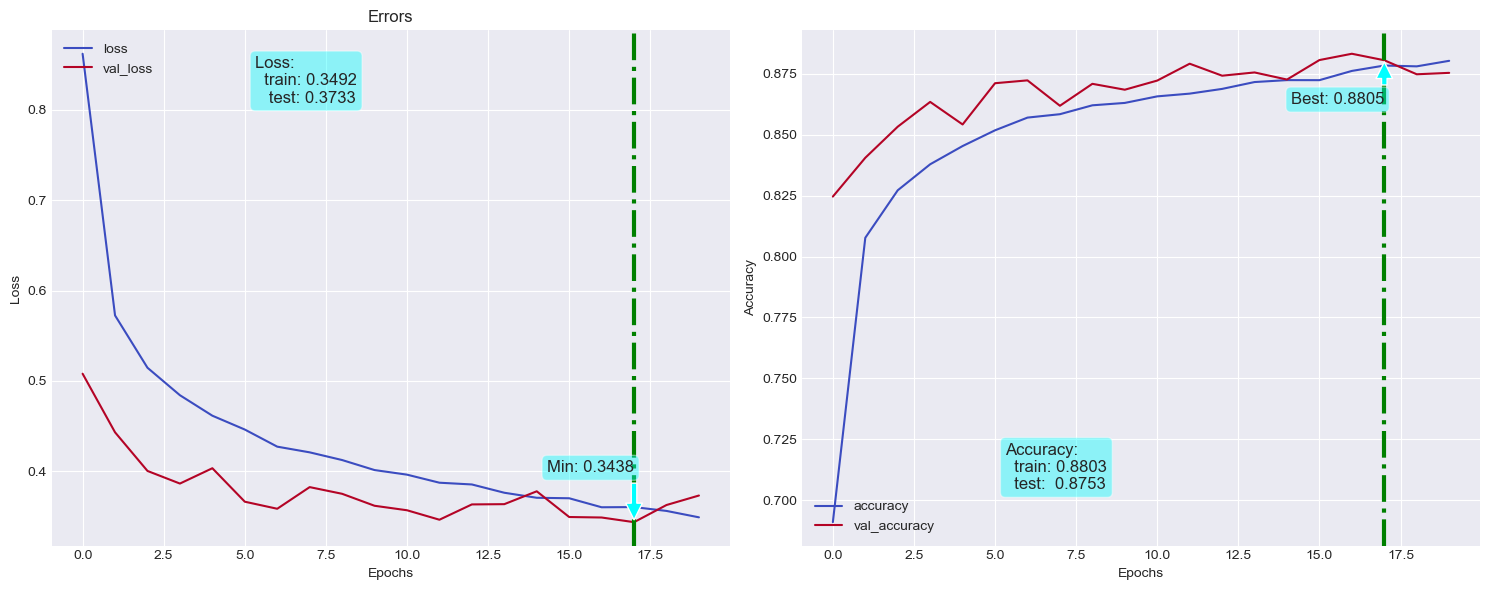

In [69]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [70]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_10 (Functional)      │ (None, 10)             │       409,405 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_5 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,405 (1.56 MB)

 Trainable params: 409,405 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

$$
\text{
Accuracy and Confusion Matrix
}
$$

Dataset Train
48000 48000
89.75625000000001


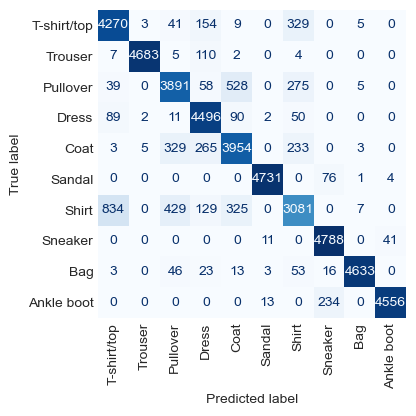

Dataset Test
12000 12000
88.05


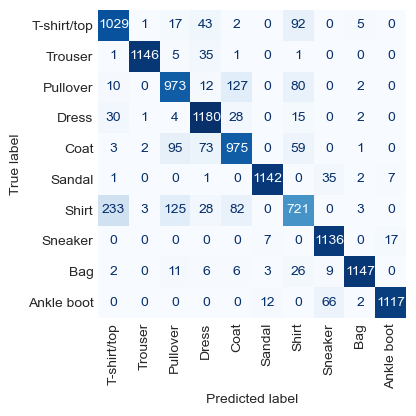

Dataset Validation
10000 10000
88.2


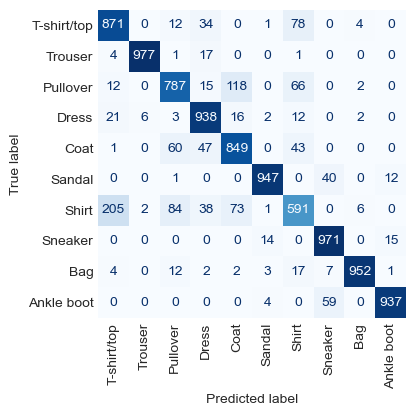

In [71]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

In [72]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_early_stopping.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_early_stopping.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 3ms/step - accuracy: 0.8805 - loss: 0.3438
Test accuracy: 0.8805000185966492
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[8 3 4 9 0]


---


$$\text{
 L1/ L2 Regularization - Dropout - Batch Normalization - Early stopping   
}
$$

In [73]:

# Define Hyperparameters
L2_REG = 0.01
DROPOUT_RATES = [0.3, 0.4, 0.5]

# Input Layer
inputs = tf.keras.Input(shape=(784,), name='input')

# Hidden Layers with Regularization, Dropout, and Batch Normalization
x = tf.keras.layers.Dense(
    392, 
    kernel_regularizer=tf.keras.regularizers.l2(L2_REG),
    activation=None, 
    name='fc_1'
)(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(DROPOUT_RATES[0])(x)

x = tf.keras.layers.Dense(
    196, 
    kernel_regularizer=tf.keras.regularizers.l2(L2_REG),
    activation=None, 
    name='fc_2'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(DROPOUT_RATES[1])(x)

x = tf.keras.layers.Dense(
    98, 
    kernel_regularizer=tf.keras.regularizers.l2(L2_REG),
    activation=None, 
    name='fc_3'
)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(DROPOUT_RATES[2])(x)

# Output Layer
outputs = tf.keras.layers.Dense(out_len, activation='softmax', name='output')(x)

# Define Model
model = tf.keras.Model(inputs=inputs, outputs=outputs)



$$
\text{
Compiling the model
}
$$

In [74]:
# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

$$
\text{
Callbacks
}
$$

In [77]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

$$
\text{
Fitting the model
}
$$

In [78]:
# Train Model
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS, 
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6671 - loss: 4.2152 - val_accuracy: 0.6662 - val_loss: 1.3368
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7497 - loss: 1.1620 - val_accuracy: 0.6678 - val_loss: 1.3588
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7556 - loss: 1.1422 - val_accuracy: 0.7557 - val_loss: 1.0768
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7529 - loss: 1.1259 - val_accuracy: 0.7386 - val_loss: 1.0390
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7556 - loss: 1.1138 - val_accuracy: 0.7102 - val_loss: 1.1499
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7585 - loss: 1.0943 - val_accuracy: 0.6921 - val_loss: 1.2277
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7581 - loss: 1.0813 - val_accuracy: 0.7168 - val_loss: 1.0845
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7603 - loss: 1

$$
\text{
Evaluation the model}
$$

In [79]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f'Test Accuracy: {test_acc}')


375/375 - 1s - 3ms/step - accuracy: 0.7941 - loss: 0.8628
Test Accuracy: 0.7940833568572998


,accuracy,loss,val_accuracy,val_loss
0,0.722729,2.274961,0.666167,1.336790
1,0.751000,1.159235,0.667833,1.358791
2,0.753958,1.135209,0.755667,1.076784


,accuracy,loss,val_accuracy,val_loss
17,0.769271,0.960677,0.714583,0.963914
18,0.768625,0.958434,0.754917,0.914792
19,0.768521,0.958852,0.794083,0.862777


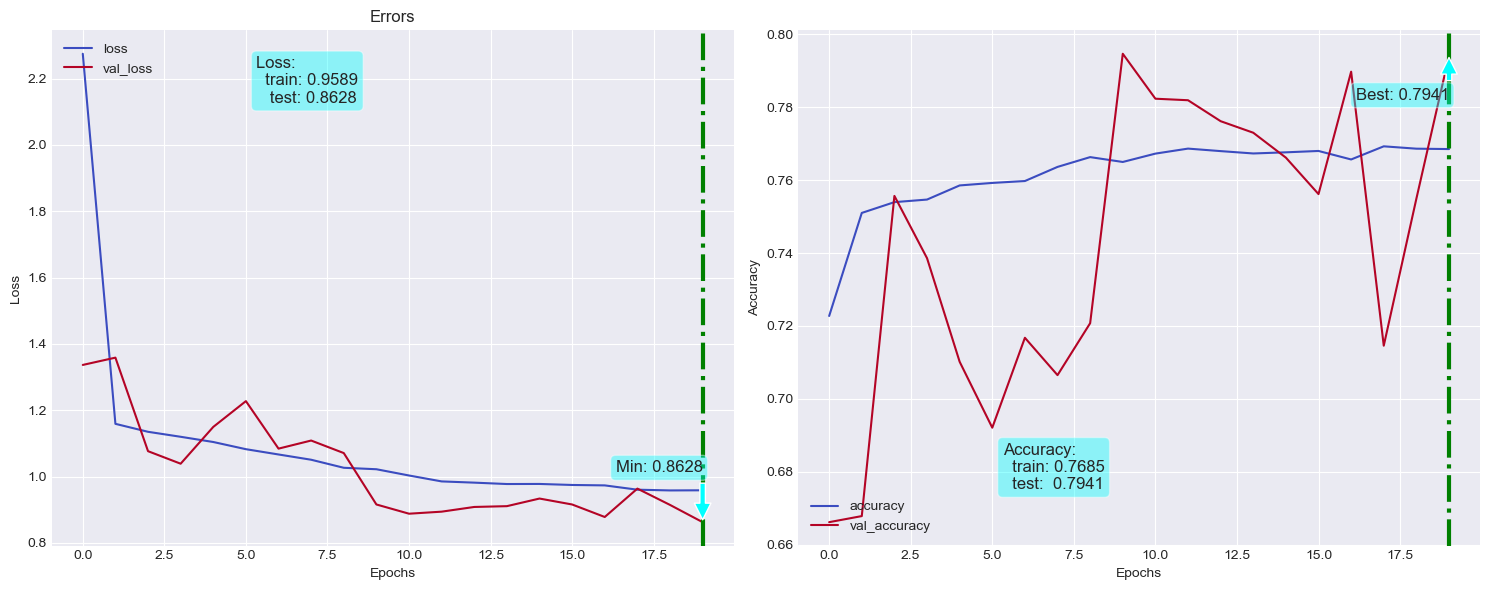

In [80]:
hist_df = pd.DataFrame(history.history) 

display(hist_df.head(3))
display(hist_df.tail(3))

fn_plot_tf_hist(hist_df = hist_df)

$$\text{
Creating the Prediction Model
}
$$

In [81]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_12 (Functional)      │ (None, 10)             │       407,788 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_6 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,788 (1.56 MB)

 Trainable params: 406,416 (1.55 MB)

 Non-trainable params: 1,372 (5.36 KB)

$$
\text{
Accuracy and Confusion Matrix
}
$$

Dataset Train
48000 48000
79.49791666666667


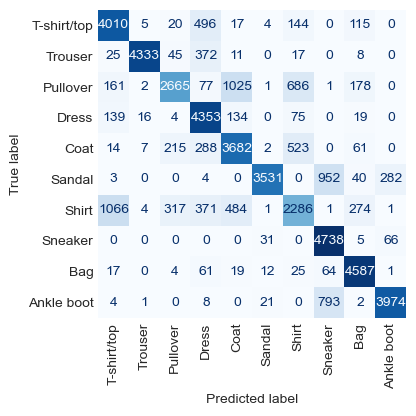

Dataset Test
12000 12000
79.40833333333333


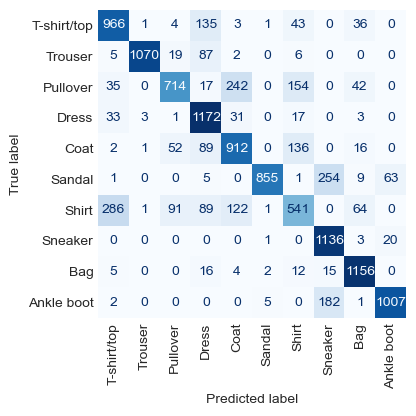

Dataset Validation
10000 10000
79.5


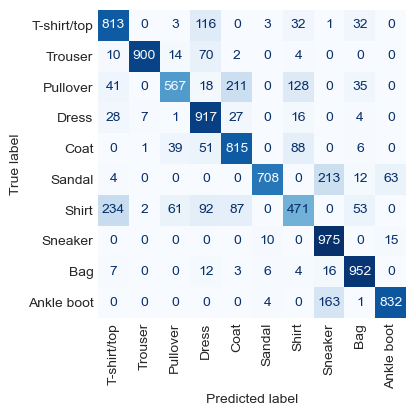

In [82]:
ds = {
    'Train' : train_ds,
    'Test' : test_ds,
    'Validation' : valid_ds
}

for name, data_ds in ds.items():
    print(f'Dataset {name}')
    accuracy_socre_confusion_matrix(
        data_ds=data_ds, 
        prediction_model=prediction_model, 
        labels=class_names.values()
    )

$$
\text{
Saving the best model and Loading the saved model
}
$$

In [84]:
# Save the model
model.save(os.path.join(modelDir, 'mnist_early_final.h5'))

# Load the model
loaded_model = tf.keras.models.load_model(os.path.join(modelDir, 'mnist_early_final.h5'))

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 5 predictions
print(predicted_labels[:5]) 


375/375 - 1s - 4ms/step - accuracy: 0.7941 - loss: 0.8628
Test accuracy: 0.7940833568572998
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[3 3 4 9 0]
